# Find the value of a variable at the times when another variable is maximum
## Claire Carouge

### Let's say you have two variables that vary in space and time. You can easily calculate the maximum of one variable each spatial point across time. Now, you would like to know what are the values of the second variable at the same time the first reaches a maximum. And this, for each spatial point. 

As we shall see, it is relatively easy to do with two variables of the same rank, and that is what the where() function is designed for. But, depending on which Python package you are using, this problem can be more complicated with variables of different ranks, or not! 
In this blog, we will look at both scenarios.

We first need to import some packages, read in some data and calculate the maximum in time at all spatial points. As usual, I'm going to use CMIP data as it's easily accessible.

In [1]:
%matplotlib inline
import xarray as xr
import numpy as np

In [2]:
# Let's get the 2m temperature and the sensible heat flux.
# We do not want to decode the time unit. 
# as datetime objects can't be plotted.
ds = xr.open_dataset('/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-0/historical/mon/atmos/Amon/r1i1p1/latest/tas/tas_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc',
                        decode_times=False)
ds1 = xr.open_dataset('/g/data/rr3/publications/CMIP5/output1/CSIRO-BOM/ACCESS1-0/historical/mon/atmos/Amon/r1i1p1/latest/hfss/hfss_Amon_ACCESS1-0_historical_r1i1p1_185001-200512.nc',
                        decode_times=False)
tas = ds.tas
hfss = ds1.hfss

In [3]:
tas

<xarray.DataArray 'tas' (time: 1872, lat: 145, lon: 192)>
[52116480 values with dtype=float32]
Coordinates:
  * time     (time) float64 6.753e+05 6.754e+05 ... 7.323e+05 7.323e+05
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
Attributes:
    standard_name:     air_temperature
    long_name:         Near-Surface Air Temperature
    units:             K
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-01-18T23:37:46Z altered by CMOR: Treated scalar d...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [4]:
hfss

<xarray.DataArray 'hfss' (time: 1872, lat: 145, lon: 192)>
[52116480 values with dtype=float32]
Coordinates:
  * time     (time) float64 6.753e+05 6.754e+05 ... 7.323e+05 7.323e+05
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:     surface_upward_sensible_heat_flux
    long_name:         Surface Upward Sensible Heat Flux
    units:             W m-2
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2012-01-15T11:36:06Z altered by CMOR: replaced missing...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [5]:
# Calculate the maximum temperature at each spatial point along the time axis:
tas_max=tas.max('time')
tas_max

<xarray.DataArray 'tas' (lat: 145, lon: 192)>
array([[258.12787, 258.12787, 258.12787, ..., 258.12787, 258.12787, 258.12787],
       [259.0565 , 259.0456 , 259.02908, ..., 259.0787 , 259.07742, 259.07217],
       [259.79144, 259.71857, 259.64832, ..., 260.0159 , 259.9404 , 259.86655],
       ...,
       [273.00952, 273.0114 , 273.0609 , ..., 273.01083, 273.00726, 273.0072 ],
       [273.2563 , 273.26328, 273.27258, ..., 273.25238, 273.25394, 273.25162],
       [273.18732, 273.18732, 273.18732, ..., 273.18732, 273.18732, 273.18732]],
      dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...

## Variables of the same dimensionality

#### Now we want to find the values of the sensible heat flux when the 2m temperature is maximum.

CPU times: user 874 ms, sys: 301 ms, total: 1.17 s
Wall time: 1.17 s


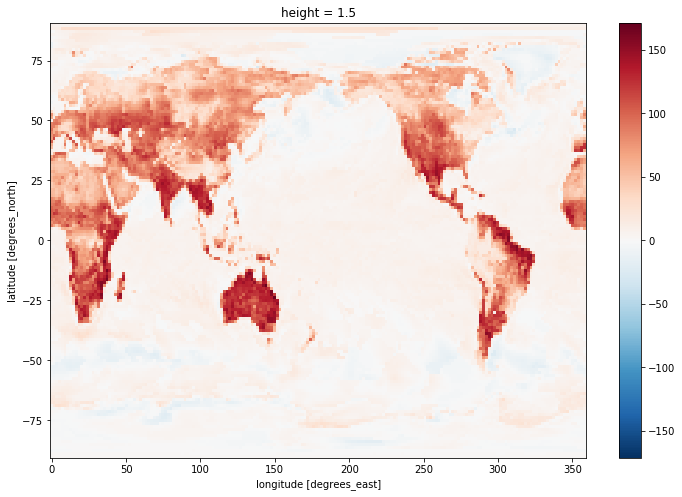

In [6]:
%%time
# Get the values of the sensible heat flux when temperature is maximum
hfss_at_max= hfss.where(tas == tas_max)
hfss_at_max.mean('time').plot(size=8)
hfss_at_max

#### As you can see, hfss_at_max has the same dimensions as the initial arrays (hfss and tas) but with a lot of missing values. Only the times and spatial points where tas is maximum will have values. So you need to then sample in some way that makes sense for your analysis to plot it. Here we arbitrarily chose to plot the mean in time.

## Variables of different dimensionality

It really depends a lot on what object you are using. It is really easy with `xarray` arrays and not so much with `numpy` arrays

To illustrate this, we are going to look at the problem of finding at what times the 2m temperature is maximum at each point

### Solution with `xarray`

In this case, it is as simple as the previous case with variables of the same rank. Note that the result is a full 3D array with lots of missing values (NaN). There are only values when `tas` is at a maximum for that point in space.

<xarray.DataArray (time: 1872, lat: 145, lon: 192)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) float64 6.753e+05 6.754e+05 ... 7.323e+05 7.323e+05
    height   float64 1.5
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    bounds:         time_bnds
    

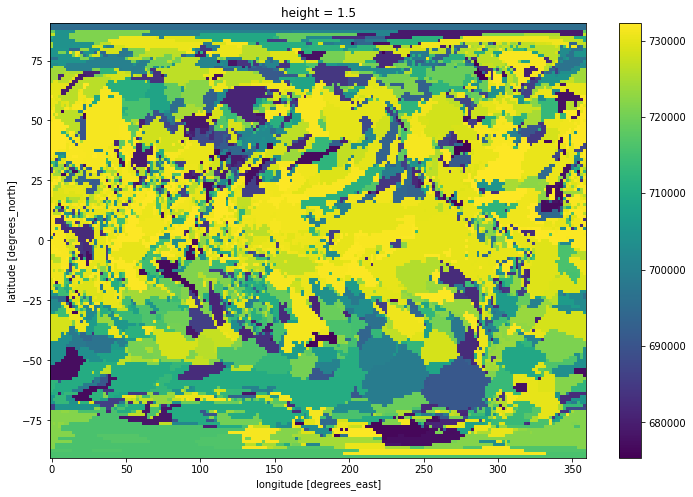

In [7]:
time_at_max=tas.time.where(tas == tas_max)
time_at_max.mean('time').plot(size=8)
time_at_max

**Note:** The time unit is number of days since 0001-01-01, so one would have to convert to a more usable format for scientific usage

## Solution for `numpy` arrays

We'll use `tas` and `tas.time` again but without using the `xarray` built-in methods. If I try the `numpy` equivalent solution:

In [8]:
nptime_at_max = np.where(tas == tas_max, tas.time, np.nan)

ValueError: operands could not be broadcast together with shapes (1872,145,192) (1872,) () 

As you see, `numpy` is unable to broadcast the different shapes together. `xarray` is much better at broadcasting as it uses all the metadata stored in the DataArray to identify the dimensions in each array.
If you have `numpy` arrays, the best solution is to quickly transform your `numpy` arrays into `xarray` DataArrays. You only need to name the dimensions. Any name will do, as long as you give the same name for the common dimensions in the :

In [9]:
new_tas = xr.DataArray(tas.values, dims=('t','l','L'))
new_time = xr.DataArray(tas.time.values, dims='t')
new_max = new_tas.max(dim='t')
new_time_at_max = new_time.where(new_tas == new_max)
new_time_at_max

<xarray.DataArray (t: 1872, l: 145, L: 192)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Dimensions without coordinates: t, l, L

As you see, you can keep your values and the time in separate arrays (new_tas and new_time). You don't need to add the time array as a coordinate to the 3D array. Although it can be a good idea to do it in general as it keeps the data self-describing.

## Extension

The other advantage of using `xarray` is it allows you to extend the functionalities beyond the built-in functions a lot more easily. The idea here is to use the  `groupby().apply()` workflow to apply a user-defined function.
You could obviously use it as a solution to the current problem:

<xarray.DataArray 'tas' (time: 1872, lat: 145, lon: 192)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * lat      (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
    height   float64 ...
  * time     (time) float64 6.753e+05 6.754e+05 ... 7.323e+05 7.323e+05

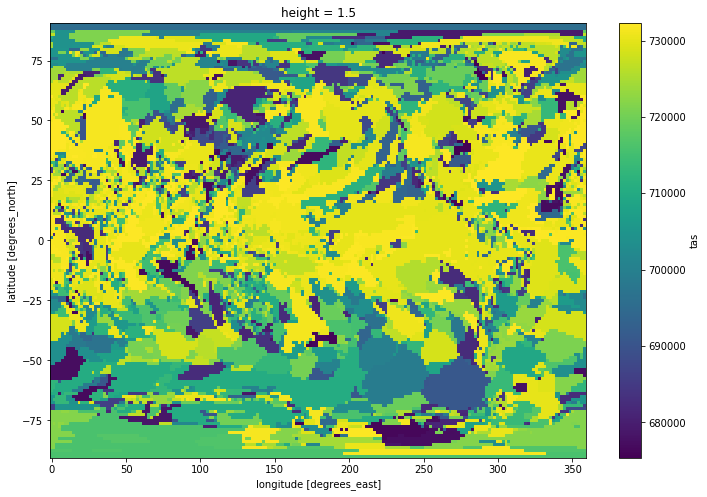

In [10]:
def check_max(data):
    return np.where(data == tas_max, data.time, np.nan)

tasmax_dates = tas.groupby('time').apply(check_max)
tasmax_dates.mean('time').plot(size=8)
tasmax_dates

But this is slower than using the built-in functions directly. And it doesn't keep the attributes (like time_bnds, units, calendar, etc)! It is then best to keep this approach for more complex problems that can not be easily solved otherwise.